# Damped Harmonic Oscillator (Ohmic Bath)
Compare Redfield and Lindblad thermalization toward Bose-Einstein occupation.

/home/leopold/miniconda3/envs/redfield/lib/python3.13/site-packages/qutip/core/environment.py:1647: UserWarning: The mpmath module is required for some operations on Ohmic environments, but it is not installed.
  warnings.warn(


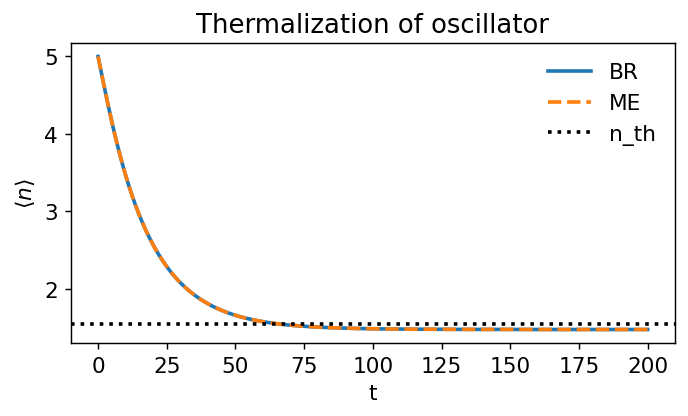

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from qutip import destroy, basis, brmesolve, mesolve, thermal_dm, tensor, qeye, OhmicEnvironment

from diagnostics import trajectory_min_eigs

from plotting import style

style()

N=10

a=destroy(N)

w=1.0

H=w*a.dag()*a

bath=OhmicEnvironment(T=2e0, wc=8.0, alpha=0.03, s=1.0)

rho0=basis(N,5)*basis(N,5).dag()

tlist=np.linspace(0,200,500)

A=a + a.dag()  # position-like coupling

sol_br=brmesolve(H, rho0, tlist, a_ops=[[A,bath]], sec_cutoff=-1)

# approximate Lindblad rates at frequency w

gamma_em=bath.power_spectrum(w)

gamma_abs=bath.power_spectrum(-w)

L_down=np.sqrt(gamma_em)*a

L_up=np.sqrt(gamma_abs)*a.dag()

sol_me=mesolve(H, rho0, tlist, c_ops=[L_down,L_up])

n_th = 1/(np.exp(w/bath.T)-1)

def exp_n(sol):
    return np.array([np.real((rho*(a.dag()*a)).tr()) for rho in sol.states])

n_br=exp_n(sol_br)

n_me=exp_n(sol_me)

plt.figure(figsize=(6,3))

plt.plot(tlist,n_br,label='BR')

plt.plot(tlist,n_me,label='ME',ls='--')

plt.axhline(n_th,color='k',ls=':',label='n_th')

plt.xlabel('t')

plt.ylabel(r'$\langle n \rangle$')

plt.legend(frameon=False)

plt.title('Thermalization of oscillator')

plt.show()